In [26]:
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns
sns.reset_defaults()
matplotlib.rc("text", usetex=True)
matplotlib.rc("font", family="serif", serif="Times New Roman", size=7.5)
matplotlib.rc("figure", autolayout=True, figsize=(4,3))
import matplotlib.pyplot as plt

import scipy

res = scipy.io.loadmat("pdp.mat")

categories = ["Ecological conditions", "Existing social conditions", "Growth environment", "Biodiversity vulnerability", "Social impact", "Propagation", "Productive vulnerability"]
cat_clr_map = {
    "Ecological conditions": plt.get_cmap("Greens"),
    "Existing social conditions": plt.get_cmap("Purples"),
    "Growth environment": plt.get_cmap("RdPu"),
    "Biodiversity vulnerability": plt.get_cmap("BuPu"),
    "Social impact": plt.get_cmap("Blues"),
    "Propagation": plt.get_cmap("Oranges"),
    "Productive vulnerability": plt.get_cmap("cividis"),
}
colors = sns.color_palette("Set2")

In [21]:
cat_clr_map["Ecological conditions"](2)

(0.9641983852364475, 0.9865128796616687, 0.9556170703575548, 1.0)

In [27]:
means = res["all_means"]
# stds = res["all_stds"]

abbr = {
"Gro1":"Growth environment",
"Gro2":"Growth environment",
"Gro3":"Growth environment",
"Gro4":"Growth environment",
"Gro5":"Growth environment",
"Gro6":"Growth environment",
"Eco1":"Ecological conditions",
"Eco2":"Ecological conditions",
"Eco3":"Ecological conditions",
"Bio1":"Biodiversity vulnerability",
"Bio2":"Biodiversity vulnerability",
"Bio3":"Biodiversity vulnerability",
"Bio4":"Biodiversity vulnerability",
"Prod1":"Productive vulnerability",
"Prod2":"Productive vulnerability",
"Prop1":"Propagation",
"Prop2":"Propagation",
"Soc1":"Social impact",
"Soc2":"Social impact",
"Soc3":"Social impact",
"Soc4":"Social impact",
"Ext1":"Existing social conditions",
"Ext2":"Existing social conditions",
}

pdp_features =["Gro1","Gro2","Gro3","Gro4","Gro5","Gro6","Eco1","Eco2","Eco3","Bio1","Bio2","Bio3","Bio4","Prod1","Prod2","Prop1","Prop2","Soc1","Soc2","Soc3","Soc4","Ext1","Ext2"]

(6, 2.4) 4 2


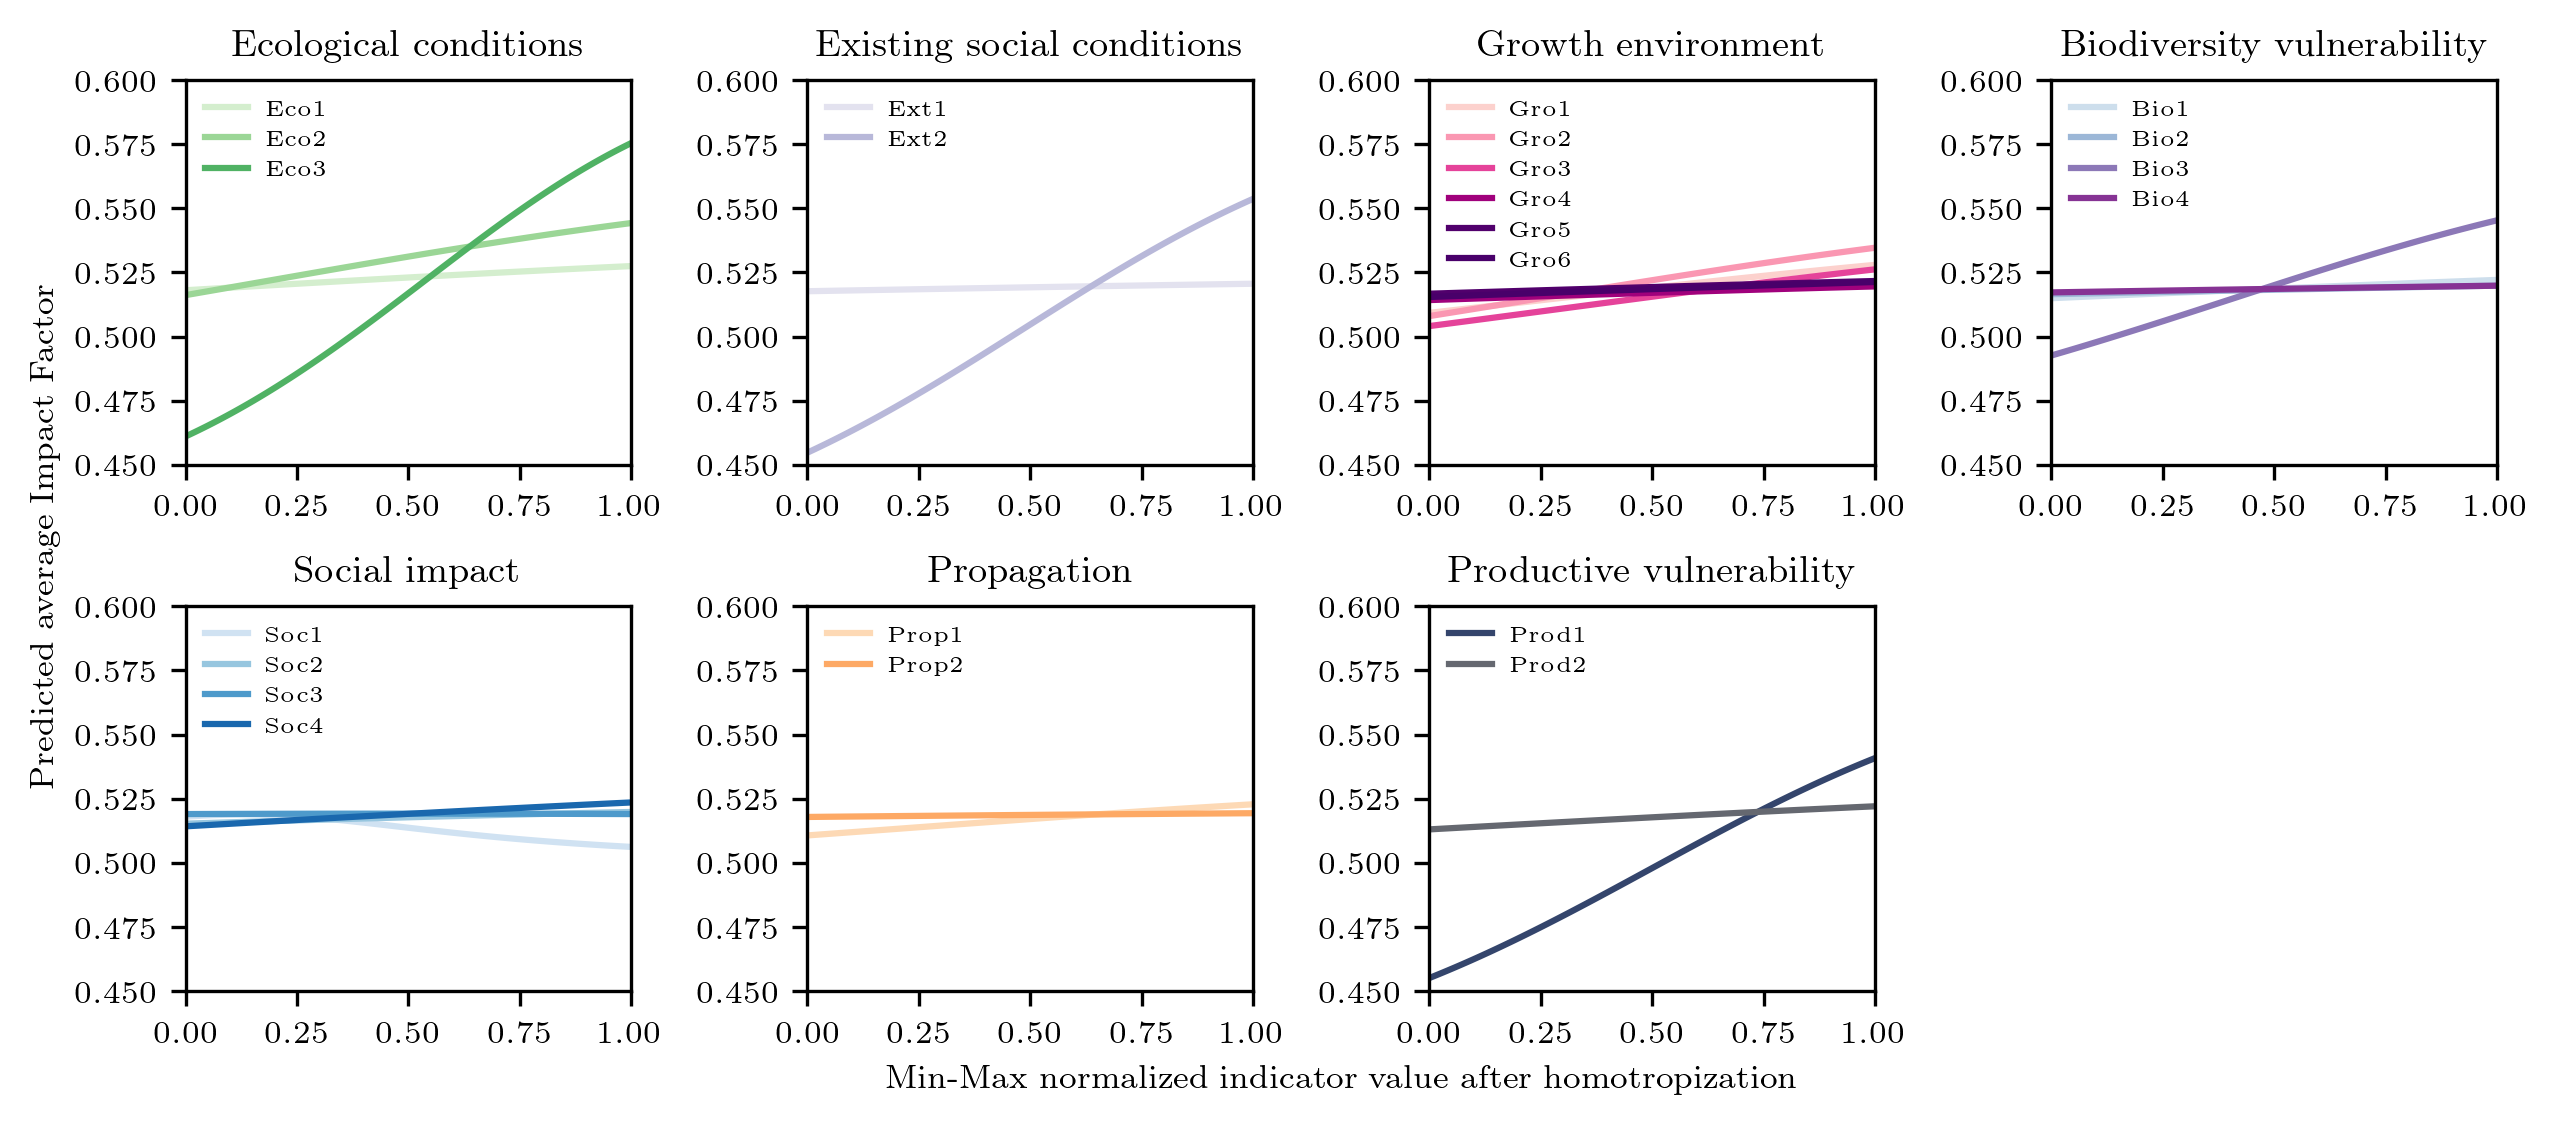

In [39]:
x_values = np.linspace(0, 1, 99)
fig = plt.figure(dpi=300, figsize=(9, 4))
max_col = 4
if len(categories) > max_col:
    width = max_col
    height = len(categories) // max_col + 1 if len(categories) % max_col != 0 else len(categories) // max_col
    figsize = (6, 1.2 * height)
else:
    figsize = (3 * len(categories), 3)
    width = len(categories)
    height = 1
print(figsize, width, height)
for cat_idx, cat in enumerate(categories):
    in_this_category = [var for var, c in abbr.items() if c == cat]
    index_ls = [pdp_features.index(feature) for feature in in_this_category]
    ax = plt.subplot(height, width, cat_idx + 1)
    for in_feature_idx, (in_feature, in_feature_index) in enumerate(zip(in_this_category, index_ls)):
        ax.plot(x_values, means[:, in_feature_index], label=in_feature, color=cat_clr_map[cat](50 + 50*in_feature_idx))
    ax.set_xlim([0,1])
    ax.set_ylim([0.45, 0.60])
    ax.set_title(cat)
    ax.legend(frameon=False, fontsize="x-small", loc="upper left")
ax = fig.add_subplot(111, frameon=False)
# plt.tick_params(labelcolor='none', which = 'both', top=False,bottom=False, left = False, right=False)
plt.ylabel('Predicted average Impact Factor\n', fontsize=8)
plt.xlabel('Min-Max normalized indicator value after homotropization', fontsize=8)
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.savefig("pdp.pdf", dpi=500)
plt.show()

(6, 7.199999999999999) 4 6


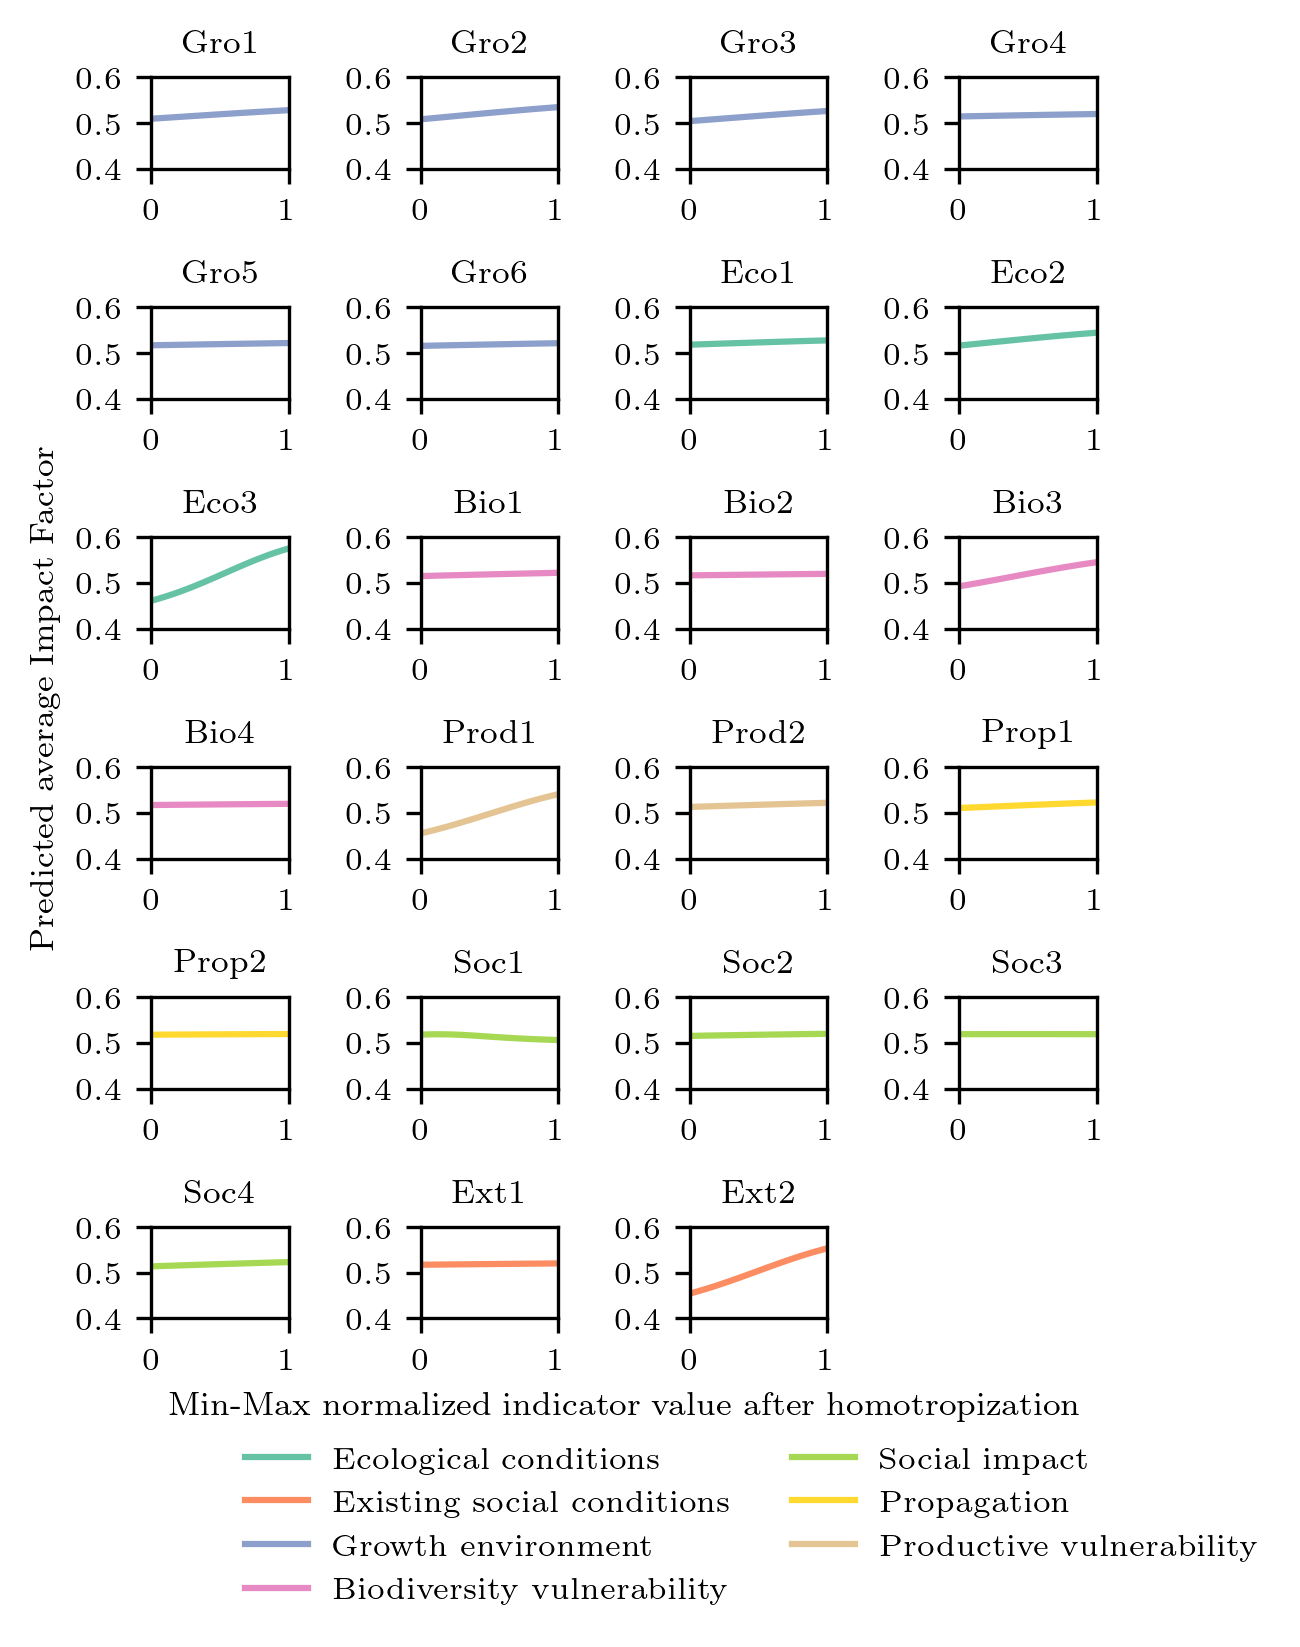

In [14]:

x_values = np.linspace(0, 1, 99)
matplotlib.rc("font", family="serif", serif="Times New Roman", size=7.5)
max_col = 4
if len(pdp_features) > max_col:
    width = max_col
    height = len(pdp_features) // max_col + 1 if len(pdp_features) % max_col != 0 else len(pdp_features) // max_col
    figsize = (6, 1.2 * height)
else:
    figsize = (3 * len(pdp_features), 3)
    width = len(pdp_features)
    height = 1
print(figsize, width, height)
figsize = [x * 0.8 for x in figsize]

fig = plt.figure(figsize=figsize, dpi=300)
from matplotlib.patches import BoxStyle

for idx, focus_feature in enumerate(pdp_features):
    ax = plt.subplot(height, width, idx + 1)
    ax.plot(x_values, means[:, idx], color=colors[categories.index(abbr[focus_feature])], linewidth=1.5)

    # ax.fill_between(x_values, means[:, idx]-stds[:, idx], means[:,idx]-stds[:, idx], alpha=.4, color=colors[categories.index(abbr[focus_feature])],
    #                 edgecolor=None)
    title = ax.set_title(focus_feature,fontsize=8)
    ax.set_yticks([0.4, 0.5, 0.6])
    ax.set_ylim([0.40, 0.60])
    ax.set_xlim([0,1])

ax = fig.add_subplot(111, frameon=False)
# plt.tick_params(labelcolor='none', which = 'both', top=False,bottom=False, left = False, right=False)
plt.ylabel('Predicted average Impact Factor', fontsize=8)
plt.xlabel('Min-Max normalized indicator value after homotropization', fontsize=8)
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)

ax = fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)

from matplotlib.lines import Line2D

legend = ax.legend(handles=[
    Line2D([], [], linewidth=1.5, color=colors[idx], label=cat) for idx, cat in enumerate(categories)],
    loc='best', bbox_to_anchor=(1.2, -0.08), markerscale=0.8, fancybox=False, frameon=False, ncol=2)
legend.get_frame().set_alpha(None)
legend.get_frame().set_facecolor([0, 0, 0, .0])
plt.tight_layout()
plt.savefig('pdp.pdf', dpi=500)
plt.show()
plt.close()